In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile

zip_path = '/content/drive/My Drive/health.zip'
extract_path = '/content/health'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ File extracted to:", extract_path)



✅ File extracted to: /content/health


In [ ]:
import os

print(os.listdir('/content/health'))


['appointments.csv', 'treatments.csv', 'patients.csv', 'billing.csv', 'doctors.csv']


In [ ]:
import pandas as pd
import os


folder = '/content/health'

csv_files = [f for f in os.listdir(folder) if f.endswith('.csv')]

dataframes = {file: pd.read_csv(os.path.join(folder, file)) for file in csv_files}
for file, df in dataframes.items():
    print(f"\n--- {file} ---")
    print(df.head())




--- appointments.csv ---
  appointment_id patient_id doctor_id appointment_date appointment_time  \
0           A001       P034      D009       2023-08-09         15:15:00   
1           A002       P032      D004       2023-06-09         14:30:00   
2           A003       P048      D004       2023-06-28          8:00:00   
3           A004       P025      D006       2023-09-01          9:15:00   
4           A005       P040      D003       2023-07-06         12:45:00   

  reason_for_visit     status  
0          Therapy  Scheduled  
1          Therapy    No-show  
2     Consultation  Cancelled  
3     Consultation  Cancelled  
4        Emergency    No-show  

--- treatments.csv ---
  treatment_id appointment_id treatment_type         description     cost  \
0         T001           A001   Chemotherapy     Basic screening  3941.97   
1         T002           A002            MRI   Advanced protocol  4158.44   
2         T003           A003            MRI  Standard procedure  3731.55   

In [ ]:
df.columns

Index(['doctor_id', 'first_name', 'last_name', 'specialization',
       'phone_number', 'years_experience', 'hospital_branch', 'email'],
      dtype='object')

In [ ]:
for file, df in dataframes.items():
    print(f"--- {file} columns ---")
    print(df.columns.tolist())
    print(f"--- {file} first 3 rows ---")
    print(df.head(3))
    print("\n")


--- appointments.csv columns ---
['appointment_id', 'patient_id', 'doctor_id', 'appointment_date', 'appointment_time', 'reason_for_visit', 'status']
--- appointments.csv first 3 rows ---
  appointment_id patient_id doctor_id appointment_date appointment_time  \
0           A001       P034      D009       2023-08-09         15:15:00   
1           A002       P032      D004       2023-06-09         14:30:00   
2           A003       P048      D004       2023-06-28          8:00:00   

  reason_for_visit     status  
0          Therapy  Scheduled  
1          Therapy    No-show  
2     Consultation  Cancelled  


--- treatments.csv columns ---
['treatment_id', 'appointment_id', 'treatment_type', 'description', 'cost', 'treatment_date']
--- treatments.csv first 3 rows ---
  treatment_id appointment_id treatment_type         description     cost  \
0         T001           A001   Chemotherapy     Basic screening  3941.97   
1         T002           A002            MRI   Advanced protocol  4

In [ ]:
for file, df in dataframes.items():
    print(f"--- {file} info ---")
    print(df.info())
    print(df.head())
    print(df.isnull().sum())
    print(df.duplicated().sum())
    print("\n")


--- appointments.csv info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   appointment_id    200 non-null    object
 1   patient_id        200 non-null    object
 2   doctor_id         200 non-null    object
 3   appointment_date  200 non-null    object
 4   appointment_time  200 non-null    object
 5   reason_for_visit  200 non-null    object
 6   status            200 non-null    object
dtypes: object(7)
memory usage: 11.1+ KB
None
  appointment_id patient_id doctor_id appointment_date appointment_time  \
0           A001       P034      D009       2023-08-09         15:15:00   
1           A002       P032      D004       2023-06-09         14:30:00   
2           A003       P048      D004       2023-06-28          8:00:00   
3           A004       P025      D006       2023-09-01          9:15:00   
4           A005       P040    

In [ ]:
print(df.info())
print(df.head())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   doctor_id         10 non-null     object
 1   first_name        10 non-null     object
 2   last_name         10 non-null     object
 3   specialization    10 non-null     object
 4   phone_number      10 non-null     int64 
 5   years_experience  10 non-null     int64 
 6   hospital_branch   10 non-null     object
 7   email             10 non-null     object
dtypes: int64(2), object(6)
memory usage: 772.0+ bytes
None
  doctor_id first_name last_name specialization  phone_number  \
0      D001      David    Taylor    Dermatology    8322010158   
1      D002       Jane     Davis     Pediatrics    9004382050   
2      D003       Jane     Smith     Pediatrics    8737740598   
3      D004      David     Jones     Pediatrics    6594221991   
4      D005      Sarah    Taylor    Dermatology    911

cleaning dataset


In [ ]:
def clean_table(df):
    df = df.drop_duplicates()


    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        mean_val = df[col].mean()
        fill_val = mean_val if not pd.isna(mean_val) else 0
        df[col] = df[col].fillna(fill_val)


    for col in df.select_dtypes(include='object').columns:
        if df[col].isnull().any():
            mode_val = df[col].mode()
            fill_val = mode_val[0] if not mode_val.empty else 'unknown'
            df[col] = df[col].fillna(fill_val)
        df[col] = df[col].astype(str).str.strip()

    return df



In [ ]:
cleaned = {}

for name, df in dataframes.items():
    cleaned[name] = clean_table(df)
    print(f"{name} cleaned. Rows: {len(cleaned[name])}")


appointments.csv cleaned. Rows: 200
treatments.csv cleaned. Rows: 200
patients.csv cleaned. Rows: 50
billing.csv cleaned. Rows: 200
doctors.csv cleaned. Rows: 10


In [ ]:
date_columns = {
    'appointments.csv': ['appointment_date'],
    'treatments.csv': ['treatment_date'],
    'patients.csv': ['date_of_birth', 'registration_date'],
    'billing.csv': ['bill_date']
}

for df_name, cols in date_columns.items():
    for col in cols:
        cleaned[df_name][col] = pd.to_datetime(cleaned[df_name][col], errors='coerce')


In [ ]:
def check_fk(child_df, child_col, parent_df, parent_col):
    missing_keys = set(child_df[child_col]) - set(parent_df[parent_col])
    if missing_keys:
        print(f"Missing foreign keys in '{child_col}': {missing_keys}")
        return child_df[child_df[child_col].isin(missing_keys)].index
    return []

fk_checks = [
    ('appointments.csv', 'patient_id', 'patients.csv', 'patient_id'),
    ('appointments.csv', 'doctor_id', 'doctors.csv', 'doctor_id'),
    ('treatments.csv', 'appointment_id', 'appointments.csv', 'appointment_id'),
    ('billing.csv', 'patient_id', 'patients.csv', 'patient_id'),
    ('billing.csv', 'treatment_id', 'treatments.csv', 'treatment_id'),
]

for child_file, child_col, parent_file, parent_col in fk_checks:
    invalid_idx = check_fk(cleaned[child_file], child_col, cleaned[parent_file], parent_col)
    if len(invalid_idx) > 0:
        cleaned[child_file] = cleaned[child_file].drop(invalid_idx)
        print(f"Dropped {len(invalid_idx)} rows from {child_file} due to invalid {child_col}")


In [ ]:
for name, df in cleaned.items():
    print(f"\n{name} cleaned info:")
    print(df.info())
    print(df.head(3))



appointments.csv cleaned info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   appointment_id    200 non-null    object        
 1   patient_id        200 non-null    object        
 2   doctor_id         200 non-null    object        
 3   appointment_date  200 non-null    datetime64[ns]
 4   appointment_time  200 non-null    object        
 5   reason_for_visit  200 non-null    object        
 6   status            200 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 11.1+ KB
None
  appointment_id patient_id doctor_id appointment_date appointment_time  \
0           A001       P034      D009       2023-08-09         15:15:00   
1           A002       P032      D004       2023-06-09         14:30:00   
2           A003       P048      D004       2023-06-28          8:00:00   

  reason_for

In [ ]:
import matplotlib.pyplot as plt


appointments = cleaned['appointments.csv']
patients = cleaned['patients.csv']
doctors = cleaned['doctors.csv']
billing = cleaned['billing.csv']


Pircharts for appointment status

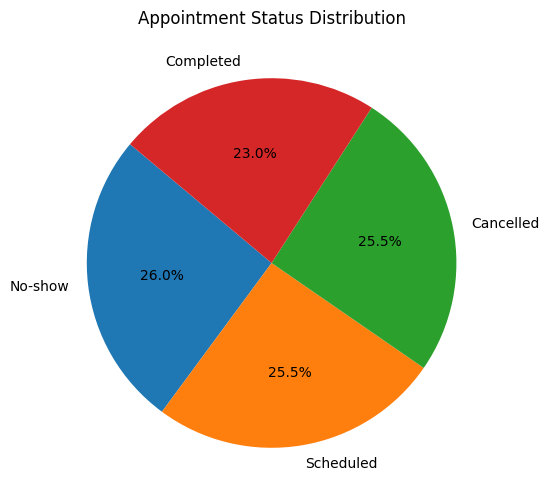

In [ ]:
status_counts = appointments['status'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Appointment Status Distribution')
plt.show()


Piecharts for patient gender distribution

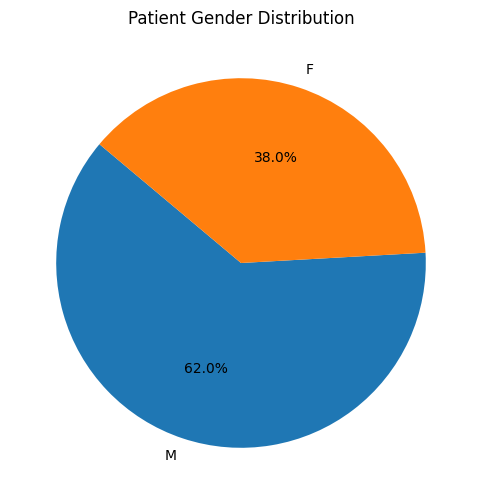

In [ ]:
gender_counts = patients['gender'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Patient Gender Distribution')
plt.show()


Piecharts for doctor specialization distribution

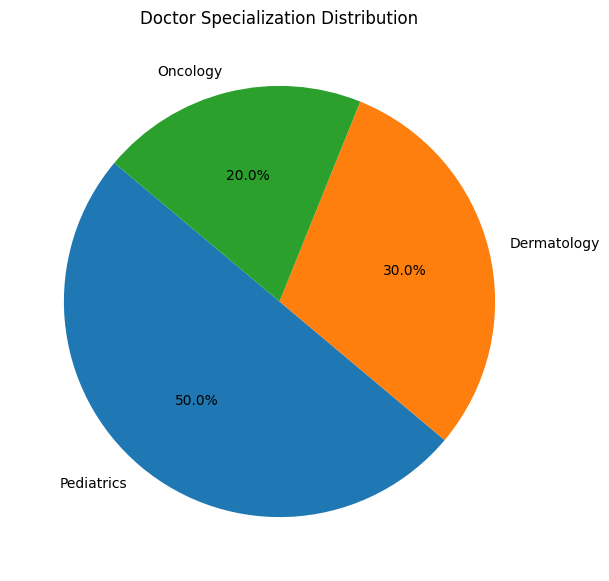

In [ ]:
specialization_counts = doctors['specialization'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(specialization_counts, labels=specialization_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Doctor Specialization Distribution')
plt.show()


Piecharts for billing payment status

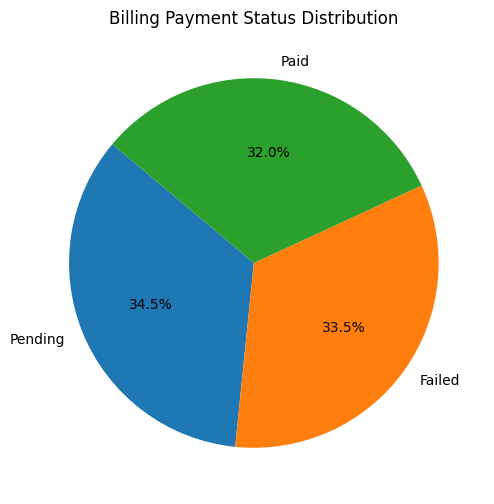

In [ ]:
payment_status_counts = billing['payment_status'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(payment_status_counts, labels=payment_status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Billing Payment Status Distribution')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

Load cleaned appointments data

In [ ]:
df = cleaned['appointments.csv'].copy()

creating binary label 'attended' vs 'no show'


In [ ]:
df['target'] = df['status'].apply(lambda x: 0 if x.lower() == 'no-show' else 1)

extracting day of the week from date

In [ ]:
df['appointment_date'] = pd.to_datetime(df['appointment_date'])
df['day_of_week'] = df['appointment_date'].dt.dayofweek

selecting features

In [ ]:
features = ['patient_id', 'doctor_id', 'reason_for_visit', 'day_of_week']

categorical features usings LabelEncoder

In [ ]:
for col in ['patient_id', 'doctor_id', 'reason_for_visit']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

X = df[features]
y = df['target']

split data inton train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression

In [ ]:
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.825
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.82      1.00      0.90        33

    accuracy                           0.82        40
   macro avg       0.41      0.50      0.45        40
weighted avg       0.68      0.82      0.75        40



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.20      0.14      0.17         7
           1       0.83      0.88      0.85        33

    accuracy                           0.75        40
   macro avg       0.51      0.51      0.51        40
weighted avg       0.72      0.75      0.73        40

